In [4]:
# Instalar pacotes
!pip install gdown spacy wordcloud matplotlib
!python -m spacy download pt_core_news_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 44.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import gdown
import json
import spacy
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [ ]:
# ID do arquivo do Drive (JSON do corpus final)
file_id = "1VS3r4zs7ad0GUmW_Is8JsymsjCpJqlTv"  #

# Baixar o arquivo
gdown.download(f"https://drive.google.com/uc?id={file_id}",
               "/content/corpus_artigos_final.json", quiet=False)

# Carregar o JSON
with open('/content/corpus_artigos_final.json', 'r', encoding='utf-8') as f:
    corpus = json.load(f)

print(f"✅ Corpus carregado! Número de artigos: {len(corpus)}")


Downloading...
From: https://drive.google.com/uc?id=1VS3r4zs7ad0GUmW_Is8JsymsjCpJqlTv
To: /content/corpus_artigos_final.json
100%|██████████| 10.3M/10.3M [00:00<00:00, 37.2MB/s]


✅ Corpus carregado! Número de artigos: 30


In [ ]:

# Mostrar os primeiros 1000 caracteres do JSON completo do corpus
print(json.dumps(corpus, ensure_ascii=False, indent=4)[:1000] + '...')


[
    {
        "titulo": "Pedagogia de Projetos e Engenharia de Software: em busca de uma sistematização para a elaboração de projetos para Feiras de Ciências",
        "informacoes_url": "https://doi.org/10.5753/sbie.2024.242228",
        "idioma": "Português",
        "storage_key": "files/Santos et al. - 2024 - Pedagogia de Projetos e Engenharia de Software em busca de uma sistematização para a elaboração de.pdf",
        "autores": [
            {
                "nome": "Júlia de Avila dos Santos1",
                "afiliacao": "",
                "orcid": "http://orcid.org/xxxx-xxxx-xxxx-xxxx"
            },
            {
                "nome": "Simone André da Costa Cavalheiro1",
                "afiliacao": "",
                "orcid": "http://orcid.org/xxxx-xxxx-xxxx-xxxx"
            }
        ],
        "data_publicacao": "2024",
        "resumo": "Feiras de Ciências são abordagens pedagógicas que colocam os es-\ntudantes como protagonistas do seu processo de aprendiza

In [ ]:
# Modelo de português
nlp_pt = spacy.load("pt_core_news_sm")


In [ ]:
# Inicializar variáveis para SEM e COM stopwords

# 🔵 Sem stopwords
total_sentencas_sem_stop = 0
total_tokens_sem_stop = 0
total_substantivos_sem_stop = 0
total_verbos_sem_stop = 0
total_preposicoes_sem_stop = 0
todos_tokens_sem_stop = []
todos_lemas_sem_stop = []

# 🟡 Com stopwords
total_sentencas_com_stop = 0
total_tokens_com_stop = 0
total_substantivos_com_stop = 0
total_verbos_com_stop = 0
total_preposicoes_com_stop = 0
todos_tokens_com_stop = []
todos_lemas_com_stop = []


In [ ]:
for artigo in corpus:
    texto = artigo["artigo_completo"]

    # Processar com spaCy
    doc = nlp_pt(texto)

    sentencas = list(doc.sents)

    # Tokens com e sem stopwords
    tokens_com_stop = [token for token in doc if not token.is_punct and not token.is_space]
    tokens_sem_stop = [token for token in doc if not token.is_punct and not token.is_space and not token.is_stop]

    # 🟡 Com stopwords
    total_sentencas_com_stop += len(sentencas)
    total_tokens_com_stop += len(tokens_com_stop)
    todos_tokens_com_stop += [token.text.lower() for token in tokens_com_stop if token.is_alpha]
    todos_lemas_com_stop += [token.lemma_.lower() for token in tokens_com_stop if token.is_alpha]
    total_substantivos_com_stop += len([token for token in tokens_com_stop if token.pos_ == "NOUN"])
    total_verbos_com_stop += len([token for token in tokens_com_stop if token.pos_ == "VERB"])
    total_preposicoes_com_stop += len([token for token in tokens_com_stop if token.pos_ == "ADP"])

    # 🔵 Sem stopwords
    total_sentencas_sem_stop += len(sentencas)
    total_tokens_sem_stop += len(tokens_sem_stop)
    todos_tokens_sem_stop += [token.text.lower() for token in tokens_sem_stop if token.is_alpha]
    todos_lemas_sem_stop += [token.lemma_.lower() for token in tokens_sem_stop if token.is_alpha]
    total_substantivos_sem_stop += len([token for token in tokens_sem_stop if token.pos_ == "NOUN"])
    total_verbos_sem_stop += len([token for token in tokens_sem_stop if token.pos_ == "VERB"])
    total_preposicoes_sem_stop += len([token for token in tokens_sem_stop if token.pos_ == "ADP"])



In [ ]:
numero_artigos = len(corpus)

# Médias
media_sentencas_com_stop = total_sentencas_com_stop / numero_artigos
media_tokens_com_stop = total_tokens_com_stop / numero_artigos

media_sentencas_sem_stop = total_sentencas_sem_stop / numero_artigos
media_tokens_sem_stop = total_tokens_sem_stop / numero_artigos


In [ ]:
from collections import Counter

# Frequências
freq_tokens_com_stop = Counter(todos_tokens_com_stop)
freq_tokens_sem_stop = Counter(todos_tokens_sem_stop)

top_10_tokens_com_stop = freq_tokens_com_stop.most_common(10)
down_10_tokens_com_stop = freq_tokens_com_stop.most_common()[-10:]

top_10_tokens_sem_stop = freq_tokens_sem_stop.most_common(10)
down_10_tokens_sem_stop = freq_tokens_sem_stop.most_common()[-10:]

freq_lemas_com_stop = Counter(todos_lemas_com_stop)
freq_lemas_sem_stop = Counter(todos_lemas_sem_stop)

top_10_lemas_com_stop = freq_lemas_com_stop.most_common(10)
top_10_lemas_sem_stop = freq_lemas_sem_stop.most_common(10)


In [ ]:
print("\n===== 🔵 Estatísticas SEM Stopwords =====\n")
print(f"🔹 Número total de artigos: {numero_artigos}")
print(f"🔹 Número total de sentenças: {total_sentencas_sem_stop}")
print(f"🔹 Número médio de sentenças por artigo: {media_sentencas_sem_stop:.2f}")
print(f"🔹 Número total de tokens (sem stopwords): {total_tokens_sem_stop}")
print(f"🔹 Número médio de tokens por artigo: {media_tokens_sem_stop:.2f}")
print(f"🔹 Número de substantivos: {total_substantivos_sem_stop}")
print(f"🔹 Número de verbos: {total_verbos_sem_stop}")
print(f"🔹 Número de preposições: {total_preposicoes_sem_stop}")

print("\n🔹 Top-10 tokens sem stopwords:")
for token, freq in top_10_tokens_sem_stop:
    print(f"{token}: {freq}")

print("\n🔹 Down-10 tokens sem stopwords:")
for token, freq in down_10_tokens_sem_stop:
    print(f"{token}: {freq}")

print("\n🔹 Top-10 lemas sem stopwords:")
for lema, freq in top_10_lemas_sem_stop:
    print(f"{lema}: {freq}")

# ---

print("\n===== 🟡 Estatísticas COM Stopwords =====\n")
print(f"🔹 Número total de artigos: {numero_artigos}")
print(f"🔹 Número total de sentenças: {total_sentencas_com_stop}")
print(f"🔹 Número médio de sentenças por artigo: {media_sentencas_com_stop:.2f}")
print(f"🔹 Número total de tokens (com stopwords): {total_tokens_com_stop}")
print(f"🔹 Número médio de tokens por artigo: {media_tokens_com_stop:.2f}")
print(f"🔹 Número de substantivos: {total_substantivos_com_stop}")
print(f"🔹 Número de verbos: {total_verbos_com_stop}")
print(f"🔹 Número de preposições: {total_preposicoes_com_stop}")

print("\n🔹 Top-10 tokens com stopwords:")
for token, freq in top_10_tokens_com_stop:
    print(f"{token}: {freq}")

print("\n🔹 Down-10 tokens com stopwords:")
for token, freq in down_10_tokens_com_stop:
    print(f"{token}: {freq}")

print("\n🔹 Top-10 lemas com stopwords:")
for lema, freq in top_10_lemas_com_stop:
    print(f"{lema}: {freq}")



===== 🔵 Estatísticas SEM Stopwords =====

🔹 Número total de artigos: 30
🔹 Número total de sentenças: 7919
🔹 Número médio de sentenças por artigo: 263.97
🔹 Número total de tokens (sem stopwords): 88888
🔹 Número médio de tokens por artigo: 2962.93
🔹 Número de substantivos: 34610
🔹 Número de verbos: 13719
🔹 Número de preposições: 1265

🔹 Top-10 tokens sem stopwords:
alunos: 658
al: 478
ensino: 465
aprendizagem: 404
et: 392
and: 352
m: 341
estudo: 308
n: 291
s: 272

🔹 Down-10 tokens sem stopwords:
behar: 1
roesler: 1
multiplataforma: 1
manipulative: 1
tation: 1
physics: 1
arida: 1
extending: 1
sigchi: 1
rence: 1

🔹 Top-10 lemas sem stopwords:
aluno: 786
al: 478
ensino: 466
estudo: 407
aprendizagem: 406
apresentar: 400
et: 392
professor: 380
ser: 379
ferramenta: 374

===== 🟡 Estatísticas COM Stopwords =====

🔹 Número total de artigos: 30
🔹 Número total de sentenças: 7919
🔹 Número médio de sentenças por artigo: 263.97
🔹 Número total de tokens (com stopwords): 142136
🔹 Número médio de tokens

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


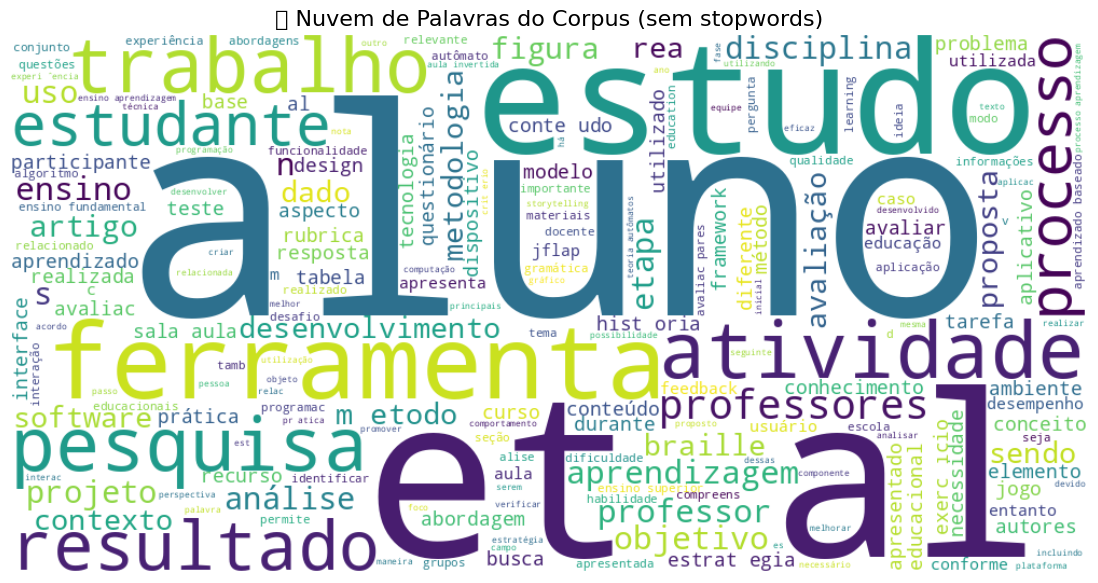

In [ ]:
# Nuvem de palavras
texto_nuvem = ' '.join(todos_tokens_sem_stop)

wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='viridis').generate(texto_nuvem)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("🔵 Nuvem de Palavras do Corpus (sem stopwords)", fontsize=16)
plt.show()
